### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

In [6]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

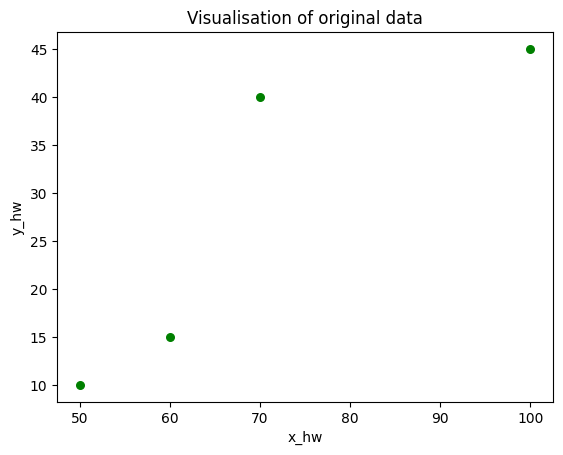

In [34]:
plt.scatter(x_hw, y_hw, s=30, c='green', marker='o')
plt.title('Visualisation of original data')
plt.xlabel('x_hw')
plt.ylabel('y_hw')
plt.show()

In [78]:
x_vec = list()
y_vec = list()

for x in x_hw:
  x_vec.append([1, x])


for y in y_hw:
  y_vec.append([y])


x_vec = np.asarray(x_vec)
y_vec = np.asarray(y_vec)

y_vec, x_vec

(array([[10],
        [15],
        [40],
        [45]]),
 array([[  1,  50],
        [  1,  60],
        [  1,  70],
        [  1, 100]]))

In [43]:
w = inv(x_vec.T.dot(x_vec)).dot(x_vec.T.dot(y_vec))
w
print('w1 = %.1f, w2 = %.3f' % (w[0][0], w[1][0]))

w1 = -22.5, w2 = 0.714


In [46]:
new_x = 80
pred_y = w[0][0] + w[1][0] * new_x
pred_y

34.64285714285718

In [79]:
x_vec = x_vec.tolist()
x_vec.append([1, new_x])
x_vec = np.asarray(x_vec)

y_vec = y_vec.tolist()
y_vec.append([pred_y])
y_vec = np.asarray(y_vec)

x_vec, y_vec

(array([[  1,  50],
        [  1,  60],
        [  1,  70],
        [  1, 100],
        [  1,  80]]),
 array([[10.        ],
        [15.        ],
        [40.        ],
        [45.        ],
        [34.64285714]]))

In [82]:
margin = 10
X_min = 40
X_max = x_vec[:,1].max()+margin

# набор точек, чтобы нарисовать прямую
X_support = np.linspace(X_min, X_max, num=100)
# предсказания нашей модели
Y_model = w[0][0] + w[1][0]*X_support

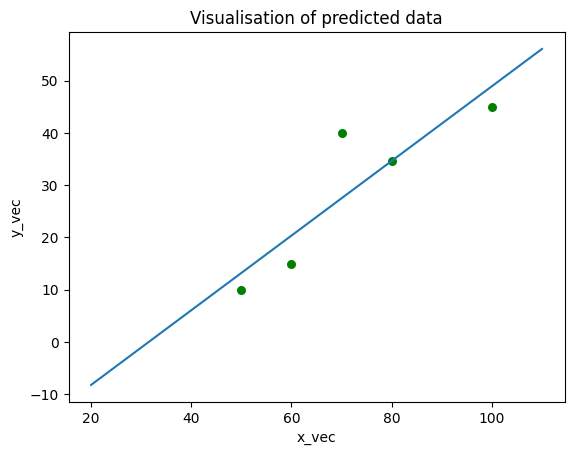

In [86]:
plt.scatter(x_vec[:, 1], y_vec, s=30, c='green', marker='o')

plt.plot(X_support, Y_model)

plt.title('Visualisation of predicted data')
plt.xlabel('x_vec')
plt.ylabel('y_vec')
plt.show()